**Lab 2: Avocado Sales**

0. Import the data and declare your package dependencies.

1. Briefly describe the data set. What information does it contain?

2. Clean the data in any way you see fit.

In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_text, geom_bar, coord_flip, geom_col, facet_wrap, theme_light, scale_y_continuous, scale_fill_manual, ggplot, aes, geom_point, labs, theme_light
df = pd.read_csv("avocado-updated-2020.csv")
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


To describe the dataset in other formats

In [275]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB
None
       average_price  total_volume          4046          4225          4770  \
count   33045.000000  3.304500e+04  3.304500e+04  3.304500e+04  3.304500e+04   
mean

In [276]:
print(df["geography"].unique())

['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston'
 'Buffalo/Rochester' 'California' 'Charlotte' 'Chicago'
 'Cincinnati/Dayton' 'Columbus' 'Dallas/Ft. Worth' 'Denver' 'Detroit'
 'Grand Rapids' 'Great Lakes' 'Harrisburg/Scranton' 'Hartford/Springfield'
 'Houston' 'Indianapolis' 'Jacksonville' 'Las Vegas' 'Los Angeles'
 'Louisville' 'Miami/Ft. Lauderdale' 'Midsouth' 'Nashville'
 'New Orleans/Mobile' 'New York' 'Northeast' 'Northern New England'
 'Orlando' 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh' 'Plains'
 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke' 'Sacramento'
 'San Diego' 'San Francisco' 'Seattle' 'South Carolina' 'South Central'
 'Southeast' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa' 'Total U.S.' 'West'
 'West Tex/New Mexico']


In [277]:
def area(region):
    states = ['California', 'South Carolina']
    country = ['Total U.S.']
    cities = ['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston','Buffalo/Rochester', 'Charlotte', 'Chicago', 'Cincinnati/Dayton',
              'Columbus', 'Dallas/Ft. Worth', 'Denver', 'Detroit', 'Grand Rapids','Harrisburg/Scranton', 'Hartford/Springfield', 'Houston', 'Indianapolis',
              'Jacksonville', 'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale', 'Nashville', 'New Orleans/Mobile', 'New York',
              'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh', 'Portland','Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
              'San Diego', 'San Francisco', 'Seattle', 'Spokane', 'St. Louis','Syracuse', 'Tampa']
    regions = ['Great Lakes', 'Midsouth', 'Northeast', 'Northern New England',
               'Plains', 'South Central', 'Southeast', 'West', 'West Tex/New Mexico']

    if region in states:
        return 'State'
    elif region in country:
        return 'Country'
    elif region in cities:
        return 'City'
    elif region in regions:
        return 'Region'
    elif region == 'Total U.S.':
        return 'Country'
    else:
        return 'Other'

df['area'] = df['geography'].apply(area)
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,area
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany,City
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany,City
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta,City
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta,City
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington,City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.,Country
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West,Region
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West,Region
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico,Region


In [278]:
# small Hass
# large Hass
# extra large Hass

avocado_clean = df.rename(columns={"4046":"small Hass", "4225" : "large Hass", "4770": "extra large Hass"})
print(avocado_clean.columns)


Index(['date', 'average_price', 'total_volume', 'small Hass', 'large Hass',
       'extra large Hass', 'total_bags', 'small_bags', 'large_bags',
       'xlarge_bags', 'type', 'year', 'geography', 'area'],
      dtype='object')


3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [279]:
# major_small_hass = avocado_clean[(avocado_clean["type"] == "organic") & (avocado_clean["year"] == 2017)  & (avocado_clean["area"] == "Regions") ]
major_small_hass = avocado_clean.query('type == "organic" & year == 2017 & area == "Region"')
# print(major_small_hass)
major_small_hass = major_small_hass.groupby('geography')["small Hass"].sum()
print(major_small_hass.idxmax())


West


4. Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [280]:
# Convert the 'date' column to datetime format
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])
avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day
avocado_clean['year'] = avocado_clean['date'].dt.year
# print(avocado_clean.head())


average_volume_by_month = avocado_clean.groupby(by = ["month","year"])['total_volume'].mean()

print(average_volume_by_month.idxmax())
print(average_volume_by_month.max())


(5, 2020)
1458037.5165185183


5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.

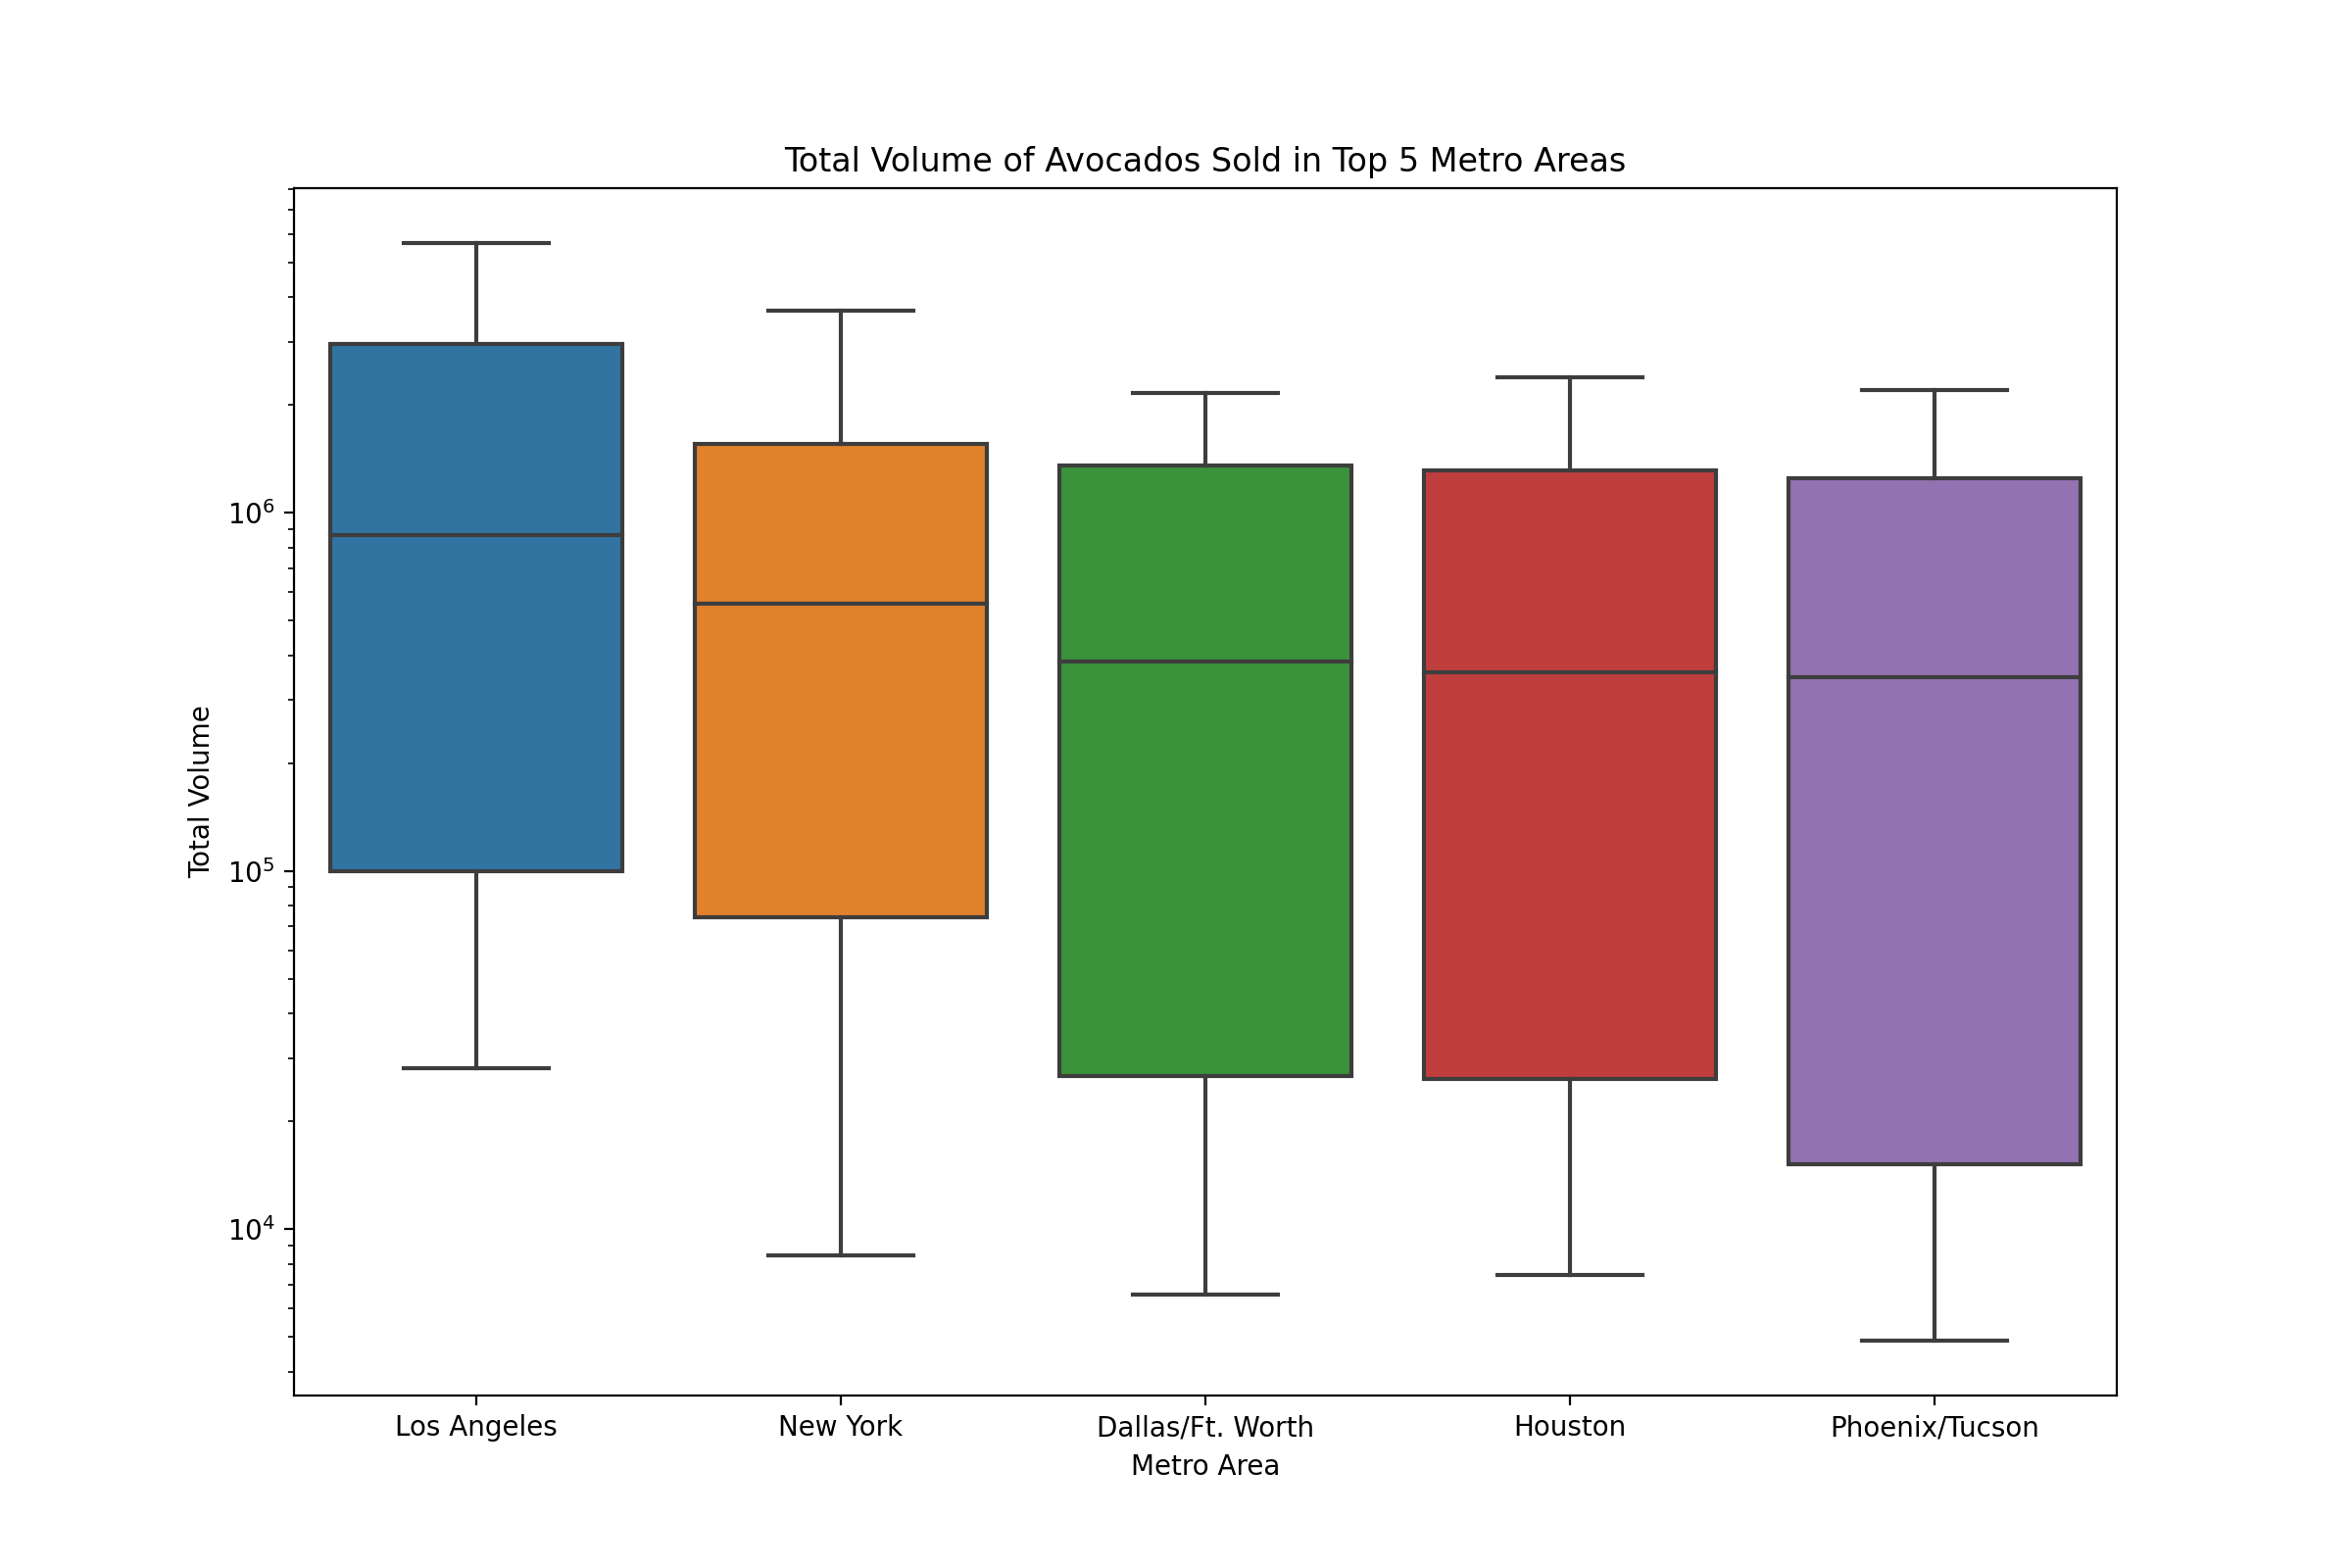

In [281]:

metro_area = avocado_clean[avocado_clean['area'] == 'City']

total_volume_by_metro = metro_area.groupby('geography')['total_volume'].mean().sort_values(ascending=False)
# print(total_volume_by_metro)
top5_metro_areas = total_volume_by_metro.head(5).index
top5_metro_data = metro_area[metro_area['geography'].isin(top5_metro_areas)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=top5_metro_data, x='geography', y='total_volume', order=top5_metro_areas)
plt.title('Total Volume of Avocados Sold in Top 5 Metro Areas')
plt.ylabel('Total Volume')
plt.xlabel('Metro Area')
plt.yscale('log')
plt.show()


6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.
7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.

In [282]:
california_region = ["Los Angeles","San Diego","Sacramento","San Francisco"]
california_avocado_clean = avocado_clean[avocado_clean["geography"].isin(california_region)]
california_avocado_clean
total_volume_by_metro = california_avocado_clean.groupby(['geography', 'type'])['average_price'].mean().reset_index()
pivot_table = total_volume_by_metro.pivot(index="geography", columns="type", values="average_price")
print(pivot_table)
pivot_table['price_difference'] = pivot_table['organic'] - pivot_table['conventional']
pivot_table
print(pivot_table['price_difference'].idxmax())
print(pivot_table['price_difference'].max())

type           conventional   organic
geography                            
Los Angeles        1.047124  1.574902
Sacramento         1.295359  1.873856
San Diego          1.113856  1.798366
San Francisco      1.400490  2.119444
San Francisco
0.718954248366013


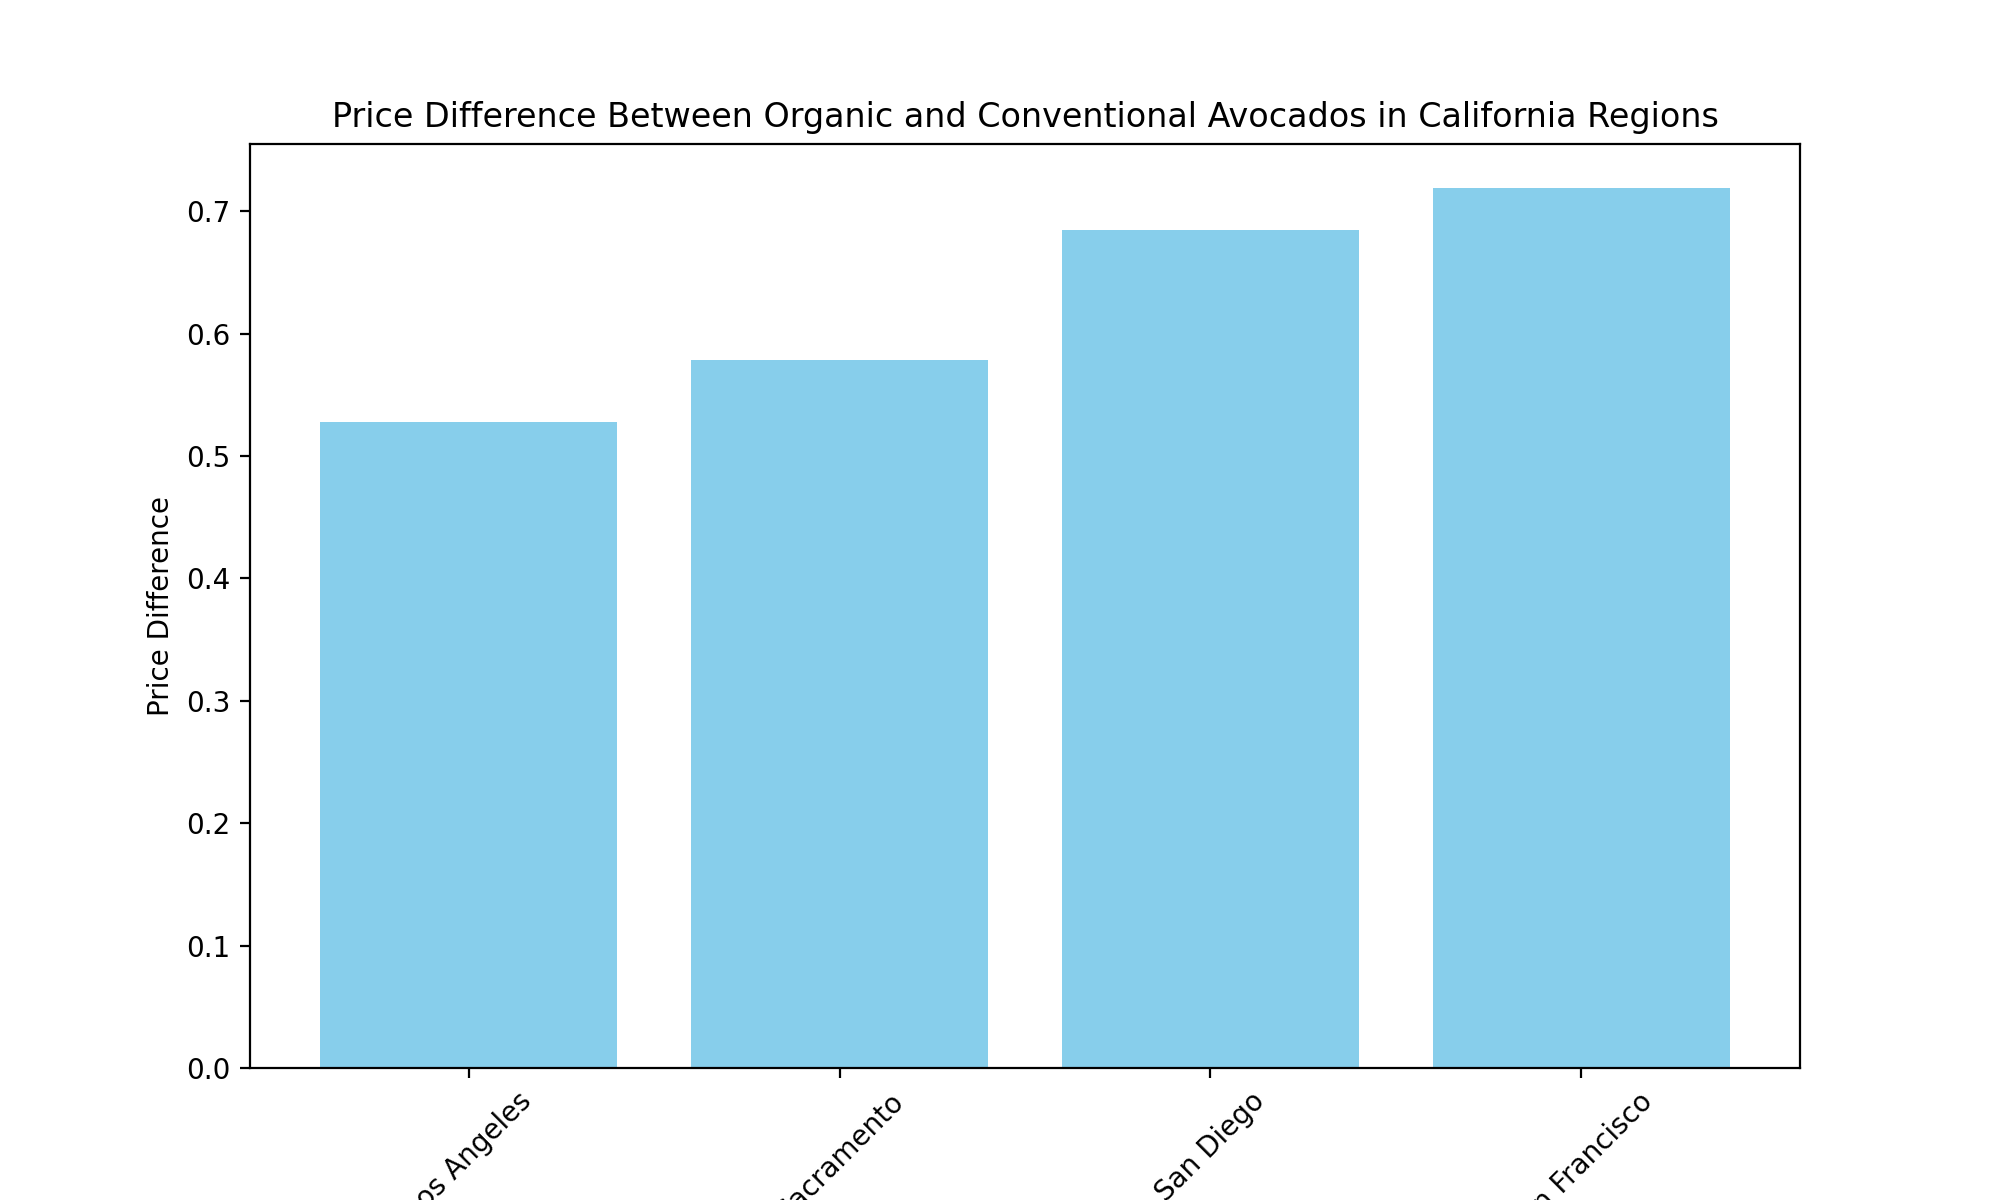

In [283]:
geo = pivot_table.index
diff = pivot_table['price_difference']

plt.figure(figsize=(10, 6))
plt.bar(geo, diff, color='skyblue')
plt.title('Price Difference Between Organic and Conventional Avocados in California Regions')
plt.ylabel('Price Difference')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.show()

From the values and the graph we can see, San Francisco have the most difference between Organic and Conventional Avocados in California Regions

8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.

In [284]:
# california_region = ["Los Angeles","San Diego","Sacramento","San Francisco"]
# california_average_hass_sales = avocado_clean[avocado_clean["geography"].isin(california_region)]
# print(california_average_hass_sales)
# california_average_hass_sales = california_average_hass_sales.groupby(by =["geography", "type"])
# avg_small_hass = california_average_hass_sales['small Hass'].mean()
# avg_large_hass = california_average_hass_sales['large Hass'].mean()
# avg_extra_large_hass = california_average_hass_sales['extra large Hass'].mean()

# total_volume = california_average_hass_sales['total volume'].mean()
# proportion_small = avg_small_hass / total_volume
# proportion_large = avg_large_hass / total_volume
# proportion_xlarge = avg_extra_large_hass / total_volume


<ipython-input-285-d9aaa531685b>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


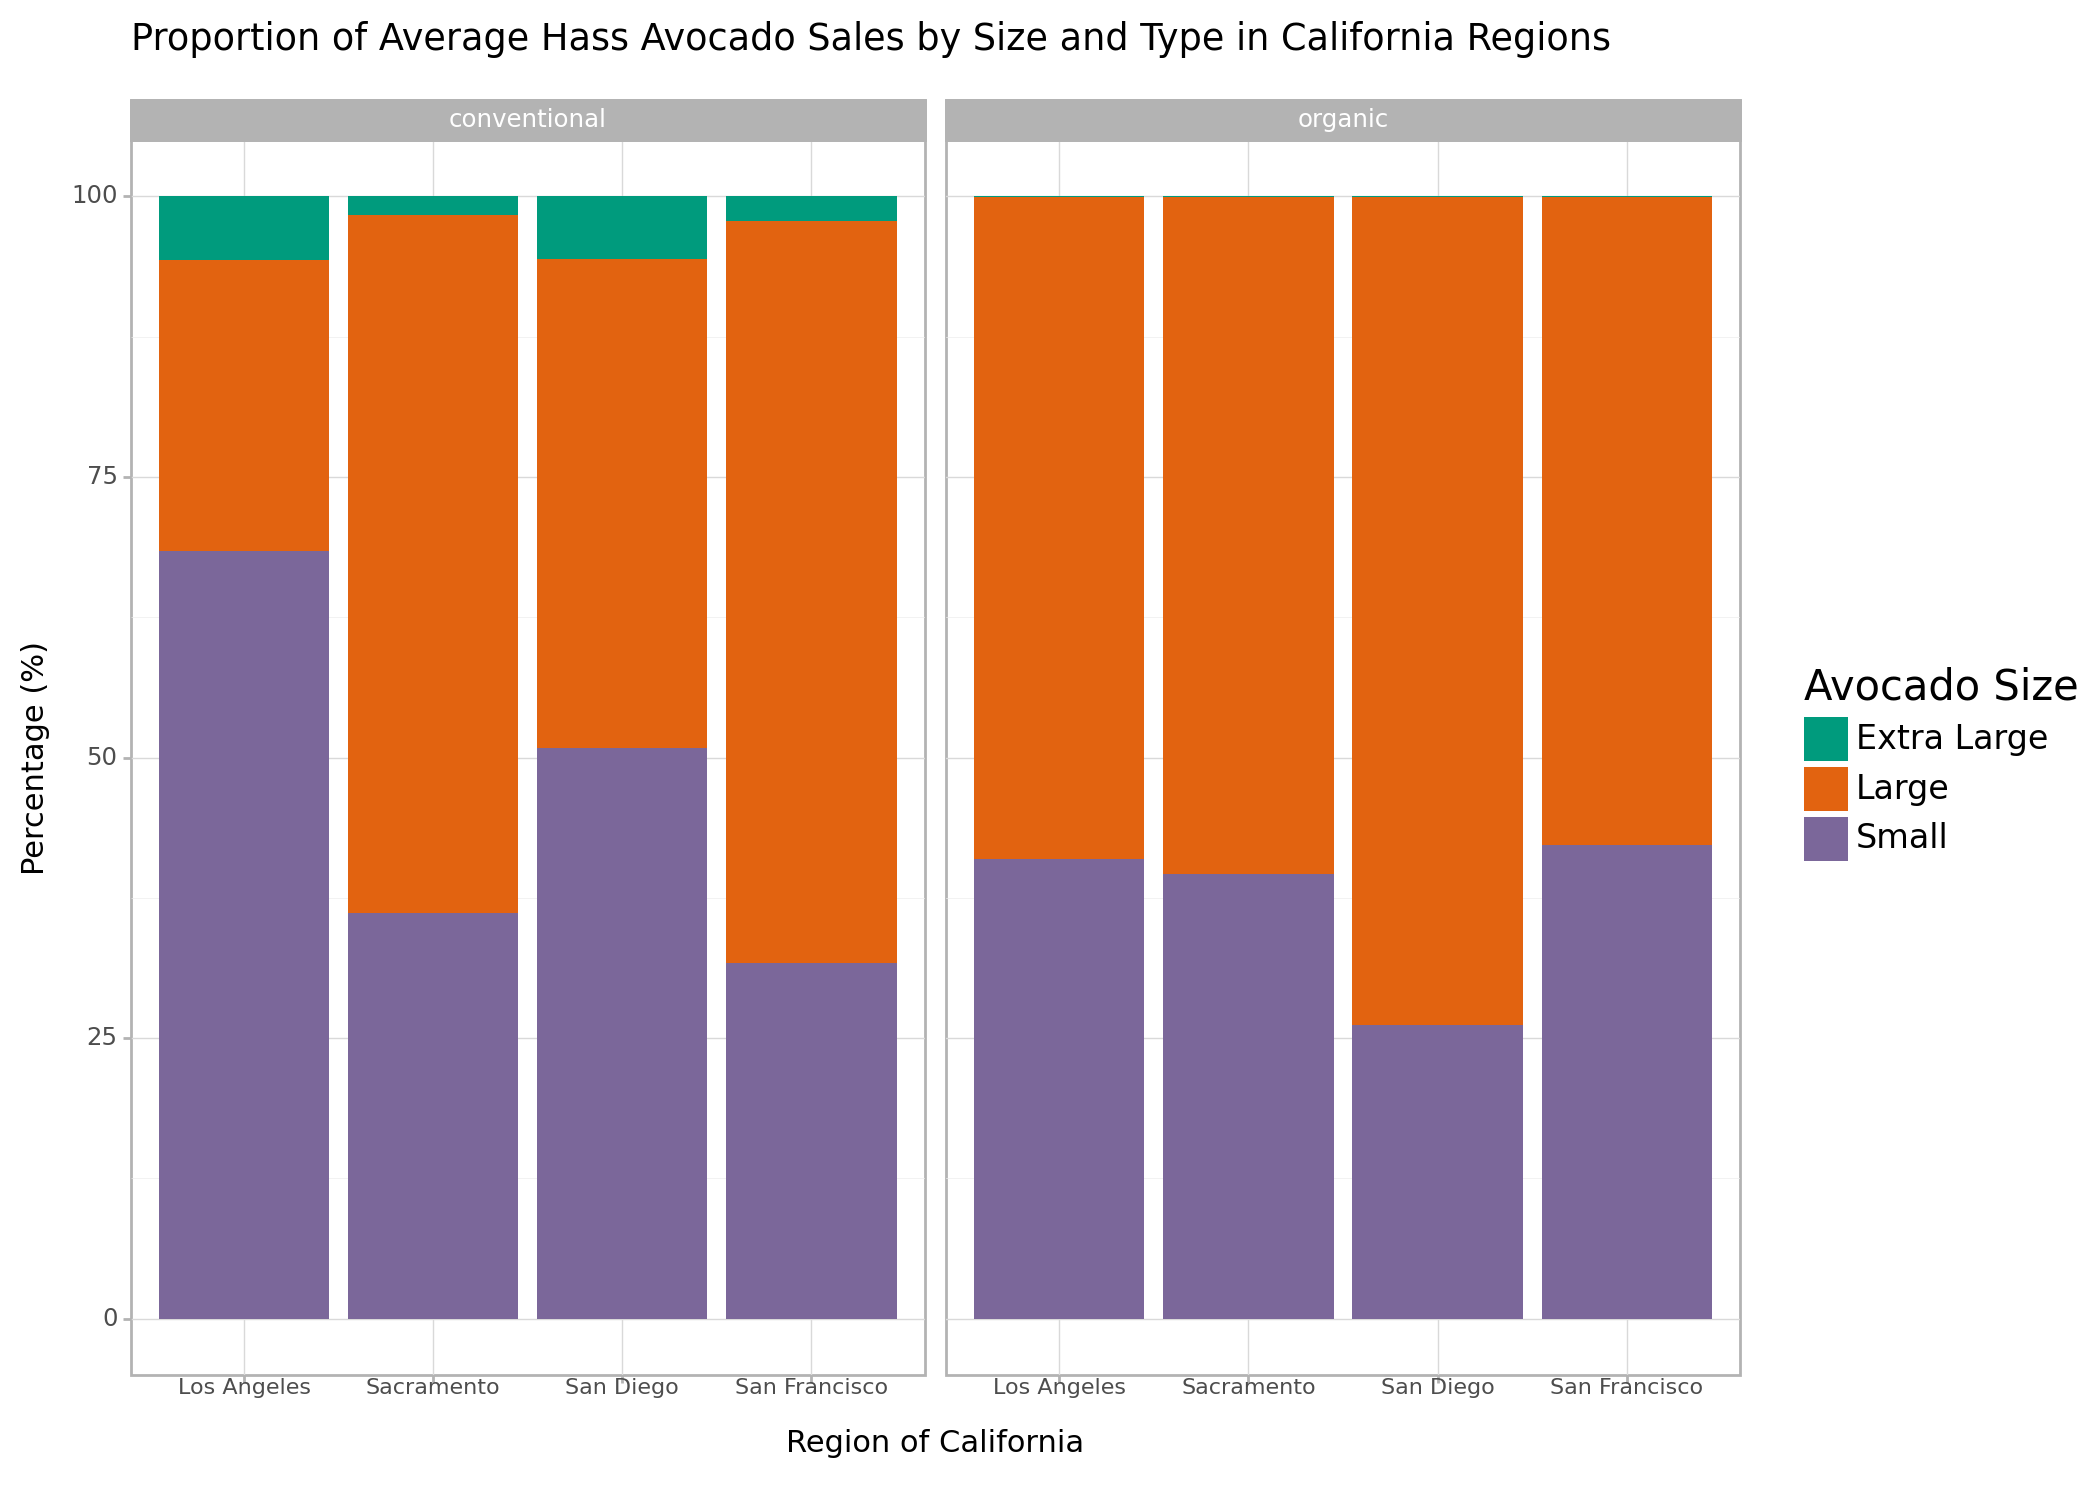

In [285]:

proportions = california_avocado_clean.groupby(['geography', 'type'])[['small Hass', 'large Hass', 'extra large Hass']].mean()
total_hass_avocado_sales = proportions.sum(axis=1)
proportions_percentage = (proportions / total_hass_avocado_sales[:, None]) * 100


proportions_percentage = proportions_percentage.reset_index()
proportions_percentage = pd.melt(proportions_percentage, id_vars=['geography', 'type'], value_vars=['small Hass', 'large Hass', 'extra large Hass'], var_name='size')

plot = (
    ggplot(proportions_percentage, aes(x='geography', y='value', fill='size'))
    + geom_bar(stat='identity', position='stack')
    + facet_wrap('~ type')
    + labs(title="Proportion of Average Hass Avocado Sales by Size and Type in California Regions",
           x="Region of California",
           y="Percentage (%)",
           fill="Avocado Size")
    + scale_fill_manual(values=['#009b7d', '#e26310', '#7b679a'],
                        labels={'small Hass': 'Small', 'large Hass': 'Large', 'extra large Hass': 'Extra Large'})
    + scale_y_continuous(limits=(0, 100), breaks=range(0, 101, 25))
    + theme_light()
    + theme(axis_text_x=element_text(angle=0, hjust=0.5, vjust=0.5, size=8),
            legend_title=element_text(size=15),
            legend_text=element_text(size=12),
            figure_size=(10.5, 7.5))
)

print(plot)


**Using Outside Data**

A joke in the media is that Millennials can’t afford houses, because they spend all their money buying avocado toast. Let’s use this data set to address that claim.

Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.

Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales.

Support your argument with a plot.

In [291]:
df_home_prices = pd.read_csv("MedianHomePrices.csv")
df_home_prices.head()
df_home_prices.columns
df_home_prices

,date,CA,Los Angeles,Sacramento,San Diego,San Francisco
0,1/1/1990,"$194,952","$215,338","$123,000","$180,484","$287,499"
1,2/1/1990,"$196,273","$208,399","$126,900","$180,714","$300,877"
2,3/1/1990,"$194,856","$208,135","$127,500","$183,701","$290,151"
3,4/1/1990,"$196,111","$219,004","$135,500","$181,567","$288,725"
4,5/1/1990,"$195,281","$209,065","$138,000","$180,794","$282,626"
...,...,...,...,...,...,...
399,4/1/2023,"$811,950","$738,520","$515,000","$930,000","$1,587,500"
400,5/1/2023,"$836,110","$744,770","$535,000","$935,000","$1,654,000"
401,6/1/2023,"$838,260","$832,210","$530,000","$958,250","$1,595,000"
402,7/1/2023,"$832,400","$851,540","$547,000","$969,020","$1,460,000"


In [295]:
df_home_prices = df_home_prices[['Sacramento','San Francisco','San Diego','Los Angeles']]
df_home_prices
avg_home_price = df_home_prices.groupby(['Sacramento', 'San Francisco','San Diego','Los Angeles']).mean()
avg_home_price
california_avocado_clean
ca_avo_size_city_type = california_avocado_clean.groupby(by=["geography","type"])['average_price'].mean()
ca_avo_size_city_type

geography      type        
Los Angeles    conventional    1.047124
               organic         1.574902
Sacramento     conventional    1.295359
               organic         1.873856
San Diego      conventional    1.113856
               organic         1.798366
San Francisco  conventional    1.400490
               organic         2.119444
Name: average_price, dtype: float64

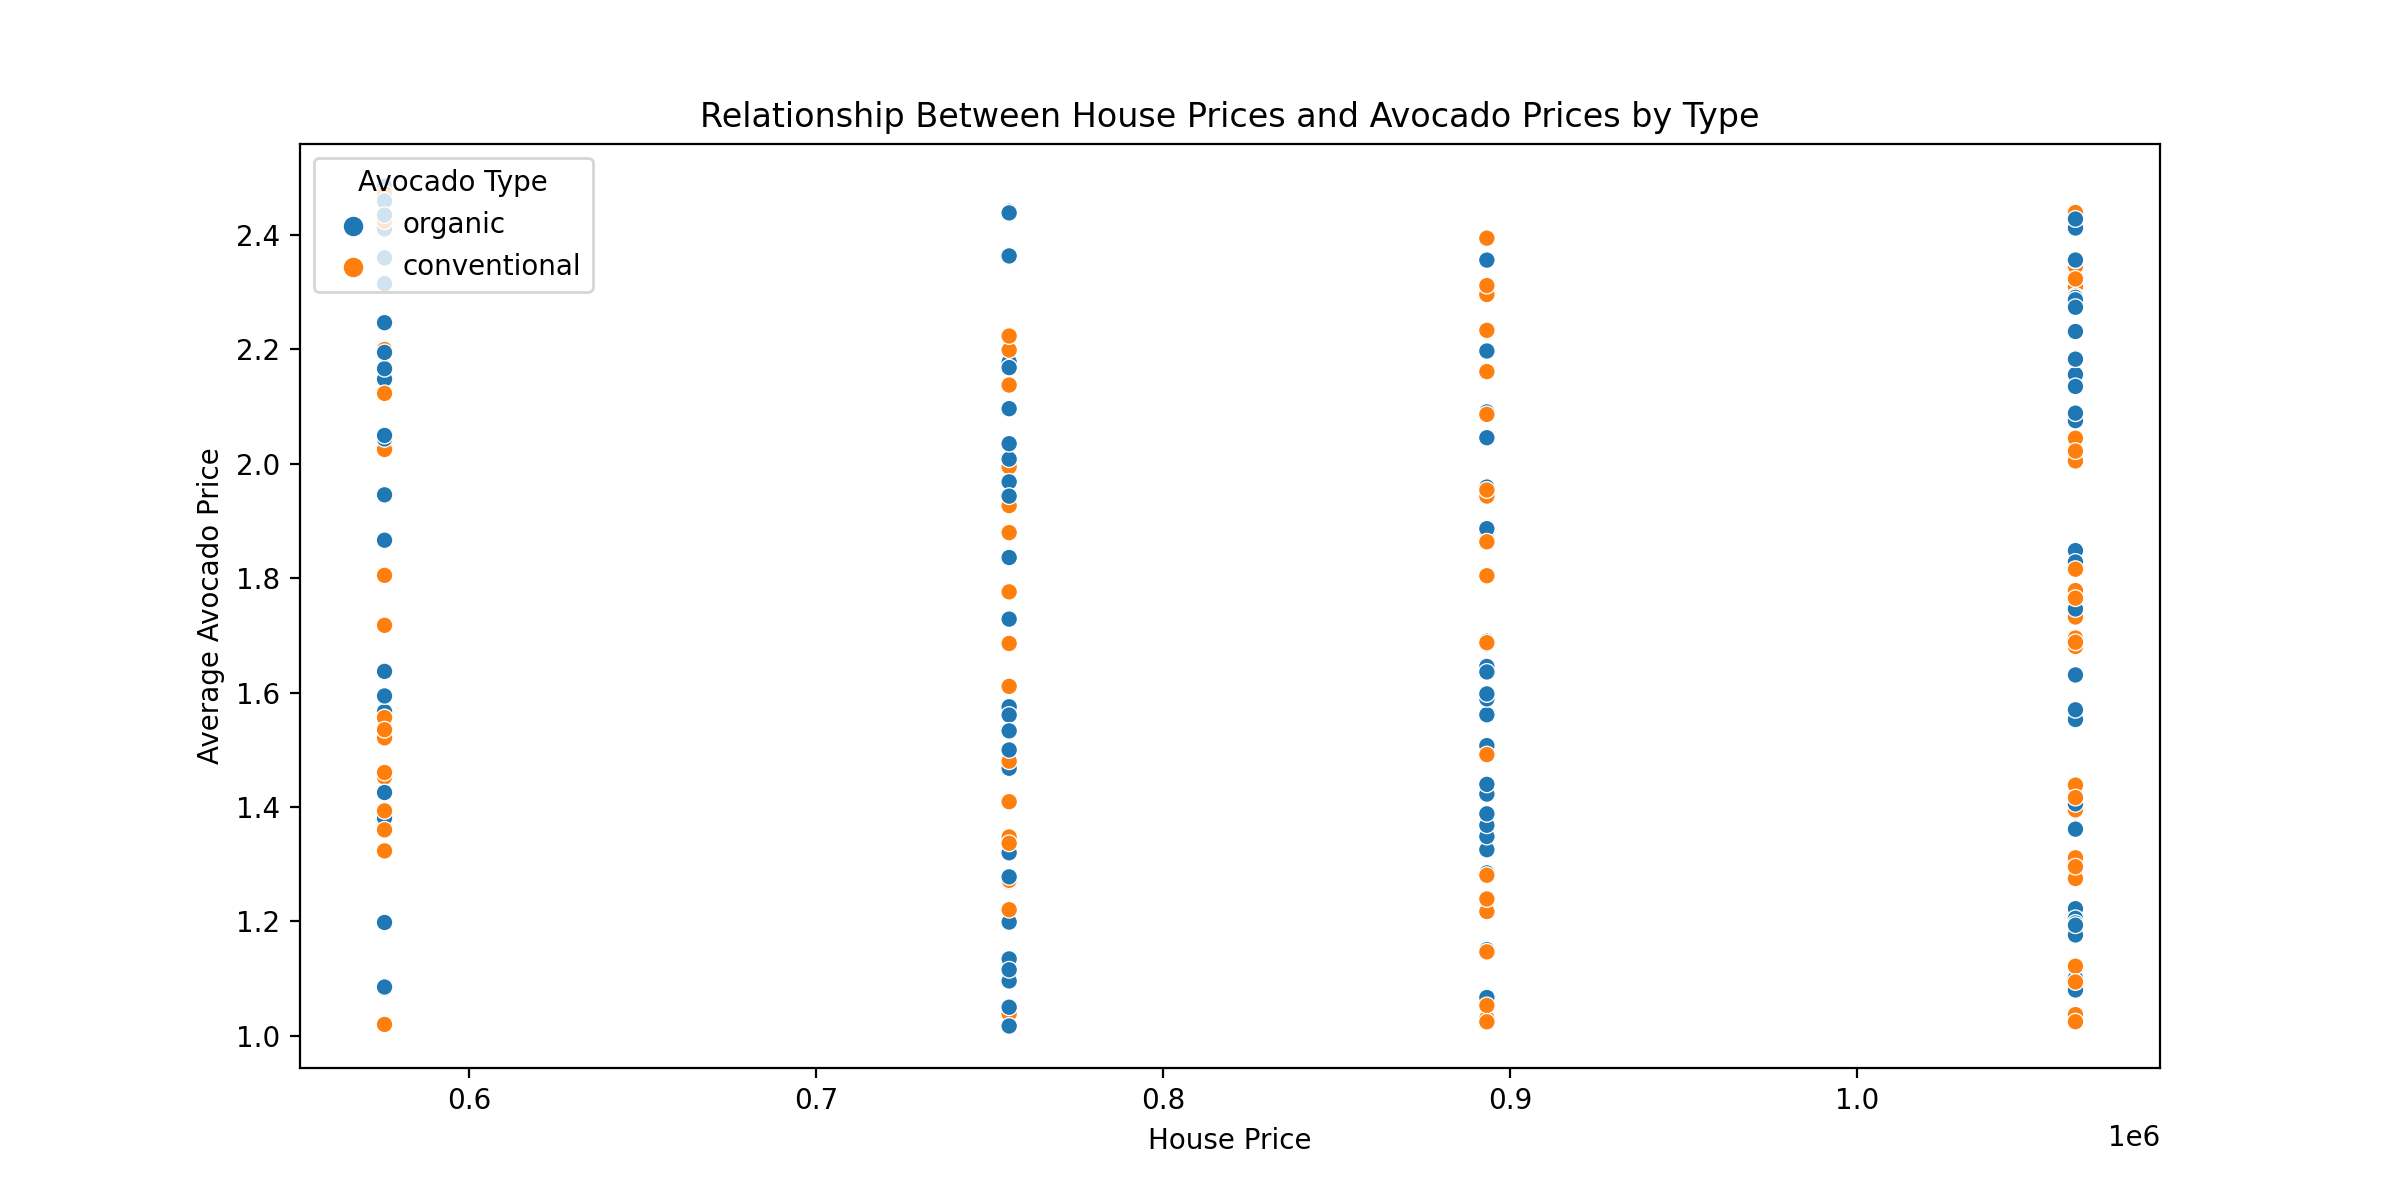

In [294]:
# Create a synthetic house price dataset
house_data = pd.DataFrame({
    'region': ["Los Angeles", "San Diego", "Sacramento", "San Francisco"],
    'house_price': np.random.uniform(500000, 1500000, size=4)  # Random house price range
})

# Merge the avocado dataset with the house price dataset
merged_data = avocado_data.merge(house_data, on='region')

# Analyze the relationship between house prices and avocado prices/sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='house_price', y='average_price', hue='type')
plt.title('Relationship Between House Prices and Avocado Prices by Type')
plt.xlabel('House Price')
plt.ylabel('Average Avocado Price')
plt.legend(title='Avocado Type', loc='upper left')
plt.show()

Based on the Average home prices and the data of average california avocado prices from 2015 to 2020.as they consider not just the cost on an avocado toast but also the cost and time to prepare an avocado toast everyday would just cost many dollars per year This analogy could be applied for any type of food we consume on a daily basis.
given is a graph of Relationship between House prices and avocado prices by type.

For the Analysis regions, I have also used the random function for the house prices.
